# <center>Machine Learning Lab: Exercise Sheet 1</center>
<center> <b>Submitted By: Mohit Bansal</b></center>
<center> <b>Student ID: 279314</b></center>

## Exercise 1: Pandas and Numpy (10 Points) <br>

### a) Word Count Program: 

+ **In this task your are required to use the provided text file and write a program that will count the number of occurances of unique words.**

In [4]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
Created on Thu Nov  8 12:45:57 2018

@author: mundanemohit
"""

# Import Libraries
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

path = '/Users/mundanemohit/Google Drive/My Work/MSc. Data Analytics/WiSe 18/3113 Machine Learning Lab/Excercises/Ex1'
os.chdir(path)

file = open('README.txt')

# Read words into a dictionary
wordDict = {}
for word in file.read().split(" "):
    if word.lower() not in wordDict:
        wordDict[word.lower()] = 1
    else:
        wordDict[word.lower()] += 1
file.close()

+ **The program should ignore words like {’the’, ’a’,’an’,’be’}**

In [5]:
# Change dictionary to a data frame

wordDF = pd.DataFrame(columns = ['Word', 'Count'])

for x, y in wordDict.items():
    wordDF = wordDF.append({'Word':x, 'Count':y}, ignore_index = True)

# List of words to be ignored
ignore = ['', 'the', 'to', 'for', 'on', 'a', '*', 'of', 'with', '<a', 'and', 'in', 'have', 'an', 'we']

# Remove these words
for w in ignore:
    wordDF = wordDF[wordDF.Word != w]

wordDF = wordDF.sort_values(by = 'Count', ascending = False)

+ **Finally you are required to generate the histogram of the top 10 most occuring
words.**

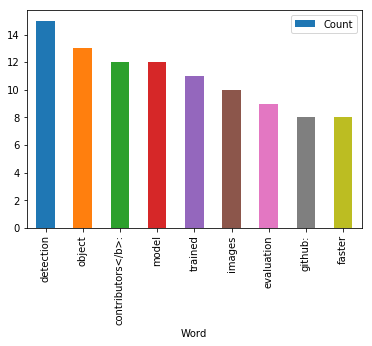

In [6]:
wordDF = wordDF.sort_values(by = 'Count', ascending = False)

# Plot top 10 words
wordDF[0:9].plot.bar(x='Word', y='Count')
plt.show()

### b) Matrix Multiplication:

+ **Create a matrix A of dimensions n × m, where n = 100 and m = 20. Initialize Matrix A.**

In [12]:
# Initialize matrix A with random values 
A = np.random.rand(100,20)

+ **Create a vector v of dimension m × 1 and initialize it with normal distribution using μ = 2 and σ = 0.01**

In [23]:
v = np.random.normal(loc = 2, scale = 0.01, size = 20)

# Check mean & S.D. of v
print("Mean: ", np.mean(v), "\nStandard Deviation: ", np.std(v))

Mean:  2.0026557838469103 
Standard Deviation:  0.010244796134148769


+ **Iterative multiply (element-wise) each row of matrix A with vector v and sum the result of each iteration in another vector c**

In [25]:
C = []
for i in range(100):
    temp = 0
    for j in range(20):
        temp += A[i][j] * v[j]
    C.append(temp)

+ **Find mean and standard deviation of the new vector c**

In [26]:
print("Mean: ", np.mean(C), "\nStandard Deviation: ", np.std(C))

Mean:  19.630063580426327 
Standard Deviation:  2.774258653646799


+ **Plot histogram of vector c using 5 bins**

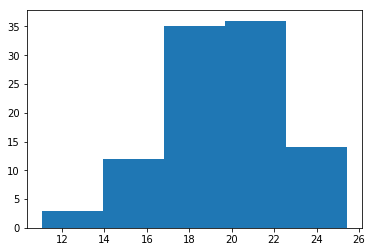

In [27]:
plt.hist(C, bins = 5)    
plt.show()

## Exercise 2: Linear Regression through exact form (10 Points) <br>

a) **Generate 3 sets of simple data. i.e. a matrix A with dimensions 100 × 2. Initialize it with normal distribution μ = 2 and σ = [0.01, 0.1, 1]**

In [8]:
A1 = np.random.normal(loc = 2, scale = 0.01, size = (100,2))
A2 = np.random.normal(loc = 2, scale = 0.1, size = (100,2))
A3 = np.random.normal(loc = 2, scale = 1, size = (100,2))
A1


array([[1.98489824, 1.99750875],
       [2.00598   , 1.99199803],
       [1.99555342, 1.99513067],
       [2.01856092, 2.0019695 ],
       [1.99142925, 1.98826646],
       [2.01156061, 2.01262333],
       [2.02605655, 1.99719452],
       [2.02184951, 1.99378906],
       [1.99890348, 1.99807478],
       [1.9979914 , 2.02688183],
       [2.02206428, 1.99610338],
       [2.01021289, 1.99250488],
       [1.99415219, 2.00140071],
       [1.98419906, 2.00842398],
       [1.98774146, 1.99949571],
       [1.99832902, 2.00581054],
       [1.98537105, 1.99659399],
       [2.01661189, 2.00904775],
       [2.00174963, 2.00518894],
       [2.00164096, 2.027433  ],
       [1.9939408 , 1.99943037],
       [2.01299893, 1.99244642],
       [1.99319225, 1.9921708 ],
       [2.00264936, 2.00200861],
       [1.99324115, 2.00565602],
       [2.01194493, 1.99376066],
       [1.99218936, 2.01087771],
       [2.01909239, 2.01787101],
       [1.99805788, 2.00438722],
       [1.99964709, 1.99028617],
       [1.

b) **Implement LEARN-SIMPLE-LINREG algorithm and train it using matrix A to learn values of $β_0$ and $β_1$**

In [113]:
def learn_simple_linreg(A):
    x = A[:,0]
    y = A[:,1]
    x_mean = np.mean(x)
    y_mean = np.mean(y)

    # Calculating beta values
    numer = np.multiply((x - x_mean), (y - y_mean))
    denom = (x-x_mean)**2
    beta_1 = np.sum(numer)/np.sum(denom)
    beta_0 = y_mean - beta_1 * x_mean

    return beta_0, beta_1

print("A1: beta0, beta1 : {} " .format(learn_simple_linreg(A1)))
print("A2: beta0, beta1 : {} " .format(learn_simple_linreg(A2)))
print("A3: beta0, beta1 : {} " .format(learn_simple_linreg(A3)))

A1: beta0, beta1 : (2.163811903774139, -0.08252106925983245) 
A2: beta0, beta1 : (1.9448544037955326, 0.022835689348032855) 
A3: beta0, beta1 : (2.096267111291143, -0.01922940170440297) 


c) **Implement PREDICT-SIMPLE-LINREG and calculate the points for each training example in matrix A.**

d) **Plot the training points from matrix A and predicted values in the form of line graph.**

e) **Comment on the effect that σ has on the line that is predicted.**

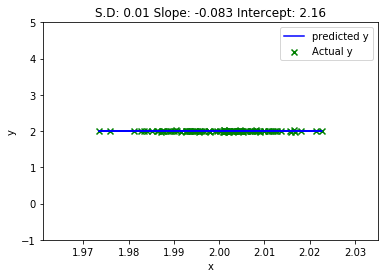

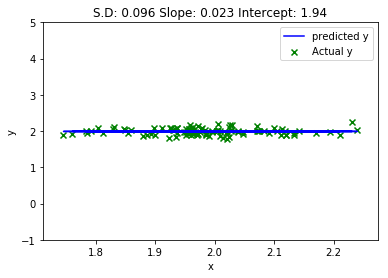

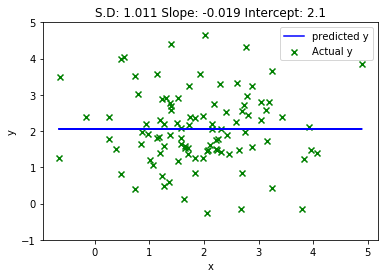

In [114]:
def predict_simple_linreg(beta_0, beta_1):
    return beta_0 + A[:,0] * beta_1

# Function for plotting y & y_hat
def pred_plot(A, beta_0, beta_1):
    y_hat = predict_simple_linreg(beta_0, beta_1)
    plt.scatter(A[:,0],A[:,1], color = 'green', marker = 'x', label = 'Actual y')
    plt.plot(A[:,0], y_hat, color = 'blue', label = 'predicted y')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title("S.D: {} Slope: {} Intercept: {}".format(round(np.std(A),3), round(beta_1,3), round(beta_0,2)))
    plt.ylim(-1,5)   # Scaled for comparison
    plt.legend()
    plt.show()

# MODEL 1
beta_0, beta_1 = learn_simple_linreg(A1)
pred_plot(A1, beta_0, beta_1)

# MODEL 2
beta_0, beta_1 = learn_simple_linreg(A2)
pred_plot(A2, beta_0, beta_1)

# MODEL 3
beta_0, beta_1 = learn_simple_linreg(A3)
pred_plot(A3, beta_0, beta_1)

What's evident from the 3 models is that the variance in X doesn't really affect the slope of the regression line much. The slope of the line $β_1$ approaches 0 in every case whereas the intercept $β_0$ is almost equal to the mean μ.

This could be interpreted as:

    Y =  σX + μ

f) **Put $β_0$ to zero and rerun the program to generate the predicted line. Comment on the change you see for the varying values of σ**

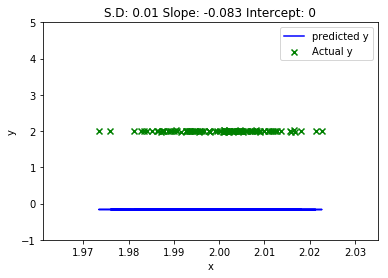

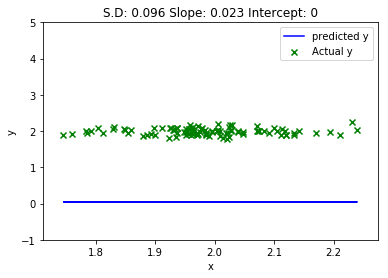

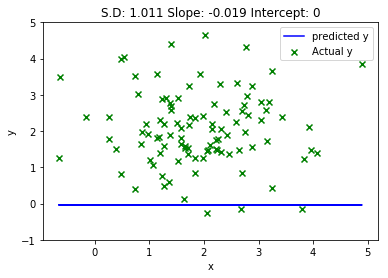

In [115]:
# MODEL 1
beta_0, beta_1 = learn_simple_linreg(A1)
pred_plot(A1, 0, beta_1)

# MODEL 2
beta_0, beta_1 = learn_simple_linreg(A2)
pred_plot(A2, 0, beta_1)

# MODEL 3
beta_0, beta_1 = learn_simple_linreg(A3)
pred_plot(A3, 0, beta_1)

$β_0$ is controls the distance of the regression line from the origin. When it is 0, the line originates from x=0

g) **Put $β_1$ to zero and rerun the program to generate the predicted line. Comment on the change you see for the varying values of σ**

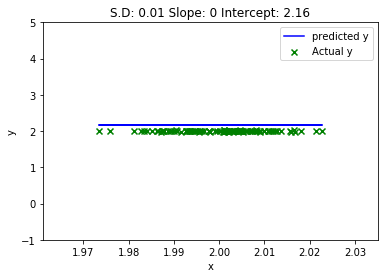

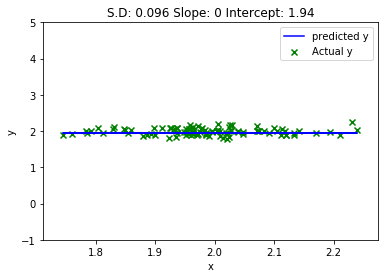

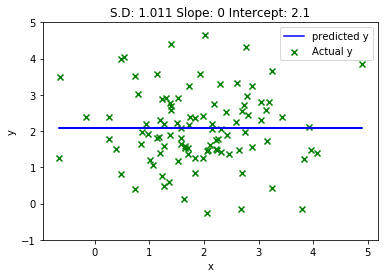

In [118]:
# MODEL 1
beta_0, beta_1 = learn_simple_linreg(A1)
pred_plot(A1, beta_0, 0)

# MODEL 2
beta_0, beta_1 = learn_simple_linreg(A2)
pred_plot(A2, beta_0, 0)

# MODEL 3
beta_0, beta_1 = learn_simple_linreg(A3)
pred_plot(A3, beta_0, 0)

$β_0$ is the slope component of the regression line. When it is 0, the line becomes flat. Without $β_0$ the regression line becomes 1-Dimensional since the $x$ component becomes null.

h) **In the end use numpy.linalg.lstsq to replace step 2 for learning values of $β_0$ and $β_1$**

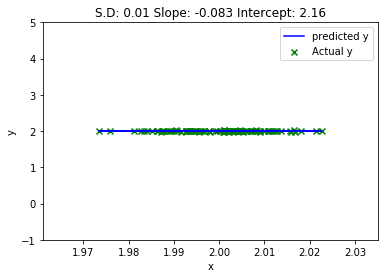

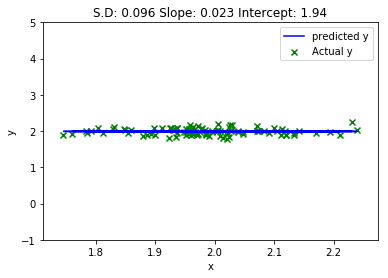

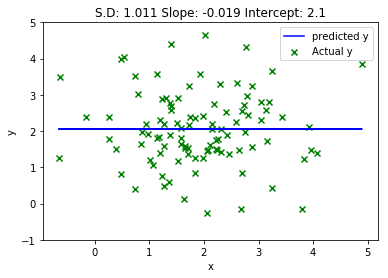

In [126]:
def lstsq(A):
    x = A[:,0]
    y = A[:,1]
    A = np.vstack([x, np.ones(len(x))]).T
    m, c = np.linalg.lstsq(A, y, rcond=None)[0]
    return c, m

# MODEL 1
beta_0, beta_1 = lstsq(A1)
pred_plot(A1, beta_0, beta_1)

# MODEL 2
beta_0, beta_1 = lstsq(A2)
pred_plot(A2, beta_0, beta_1)

# MODEL 3
beta_0, beta_1 = lstsq(A3)
pred_plot(A3, beta_0, beta_1)

The results are identical.